In [42]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

#### Test functions

In [3]:
def sum_of_sqrs(xs: np.ndarray):
    return np.sum(xs ** 2)

In [4]:
def ackley_fn(xs: np.ndarray) -> float:
    """
    The Ackley function is a widely used test problem for optimization
    algorithms. It is a multimodal function with:
     - a single global minimum, x_global = (0, 0, ..., 0) with a value of 0.0
     - many local minima.

    The function takes a numpy array of length d as an argument and
    returns the value of the function at the given point.
    """
    a = 20
    b = 0.2
    c = 2 * np.pi
    d = len(xs)

    s1 = np.sum(xs ** 2)
    s2 = np.sum(np.cos(c * xs))

    t1 = -a * np.exp(-b * np.sqrt(s1 / d))
    t2 = -np.exp(s2 / d)

    return t1 + t2 + a + np.e

#### Numerical experiments

In [5]:
np.random.seed(123)

a) sum_of_sqrs

In [6]:
x01 = np.random.rand(2) * 5
x01

array([3.48234593, 1.43069667])

In [7]:
res = minimize(sum_of_sqrs, x01)
print(res)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 6.291181325393998e-14
        x: [-1.029e-07  2.288e-07]
      nit: 3
      jac: [-1.908e-07  4.724e-07]
 hess_inv: [[ 5.722e-01 -1.758e-01]
            [-1.758e-01  9.278e-01]]
     nfev: 12
     njev: 4


b) Ackley

In [8]:
x02 = np.random.rand(2) * 5

In [9]:
res = minimize(ackley_fn, x02, method="BFGS", jac="2-point")
print(res)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 7.180951647715368
        x: [ 9.892e-01  2.967e+00]
      nit: 8
      jac: [ 4.768e-07  5.624e-07]
 hess_inv: [[ 1.881e-02  3.523e-04]
            [ 3.523e-04  2.015e-02]]
     nfev: 33
     njev: 11


c) Ackley multistart

In [66]:
STEPS = 10000

In [70]:
best_res = None
best_fun = math.inf

y = np.array([], dtype=float)
x = np.array(range(STEPS))
for _ in x:
    x02 = np.random.rand(2) * 5
    res = minimize(ackley_fn, x02, method="BFGS", jac="2-point")
    if(res.fun < best_fun):
        best_res = res
        best_fun = best_res.fun
    y = np.append(y, best_res.fun)

Text(0.5, 0, 'Iterations')

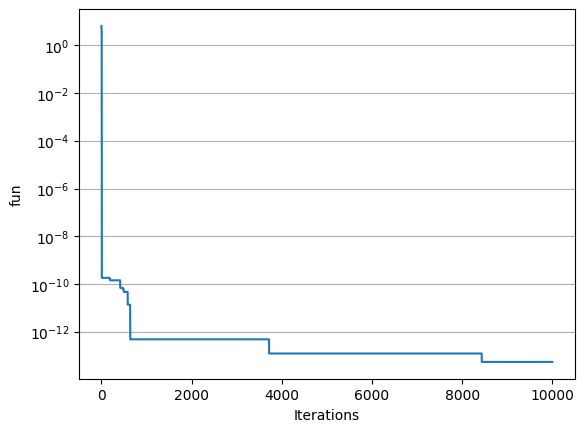

In [71]:
plt.plot(x, y, '-')
plt.yscale('log')
plt.grid(True, axis='y')
plt.ylabel('fun')
plt.xlabel('Iterations')